In [1]:
#Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [2]:
#fetching data into variable
df=pd.read_csv(r"C:\Users\OM RAJ PANDEY\Desktop\avocado.csv\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory Data Analysis

In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
#as we drop Unnamed column because it just kind of id which have no effect on dataset
df.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.shape

(18249, 13)

In [7]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

As seen in data set there is one Unnamed: 0 column which does not play any important role for prediction in the price of avocado,so I am dropping that column.
Also,most of the column are of same data type that is float and Date, type and region os of object data type.

In [8]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no null values in the above dataset

In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Above statistics data show that their multiple outliers mostly in XLarge Bags There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.Also, nmber of rows in each column are same,means there are o null values in the data set.Also,the mean and 50% vale of most of the column are same and the STD mean are very close to each other.Most of the coumn statistics daa are ear to 0 values.By checking the difference between the 75% and max value there are outliers in some of the column.

# Data Visualization

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

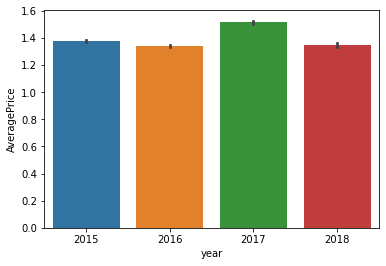

In [10]:
#checking ratio of year and price that which year had max average price
sns.barplot(x="year",y="AveragePrice",data=df)

above graph showing that 2017 year is that yeara where max average price is there

# Plotting Histogram:

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

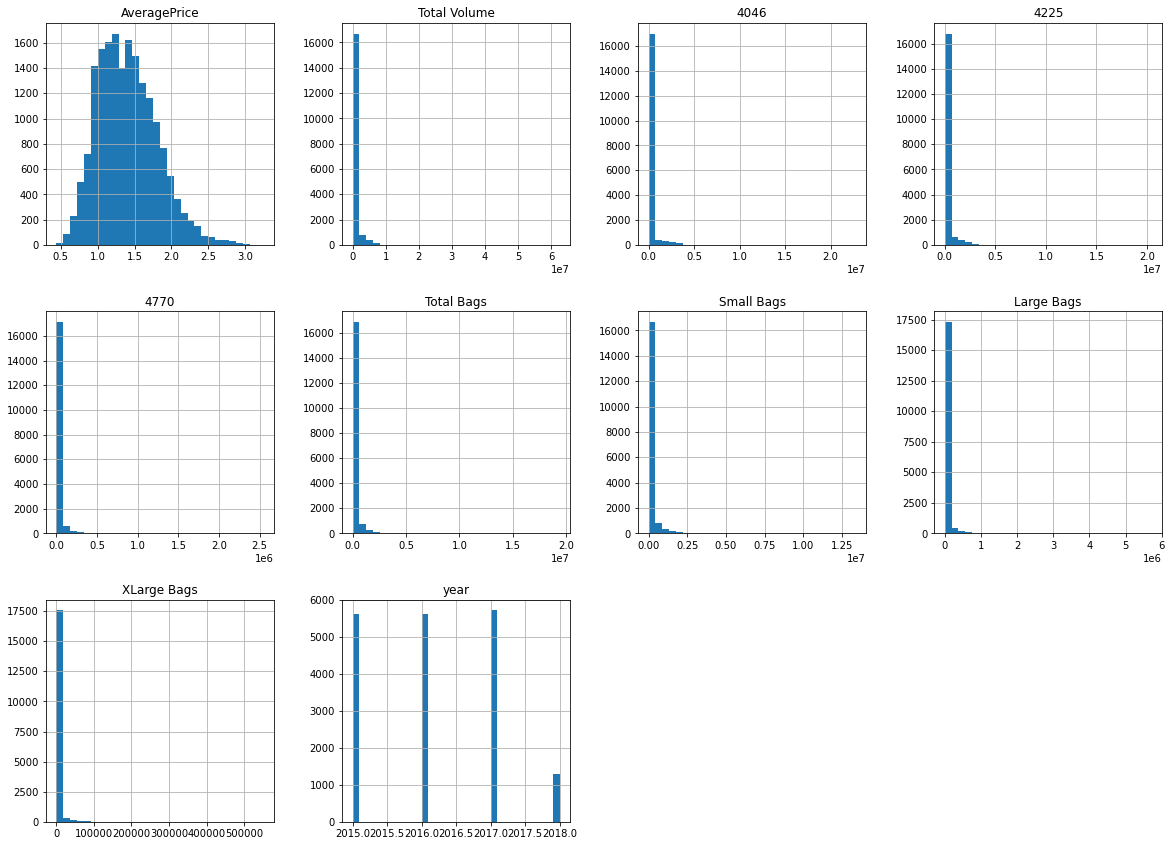

In [11]:
#Plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

Average price column is normally distributing over the histogram
Rest of the data are not much varying in term of numbers, so they are almost left skewed data.


In [12]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [13]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

The best skew value for normally distributes is very close to zero,so i am using "log1p" method to make the skew value near to zero

# Label Encoding

In [14]:
#convert Region and type into numeric value by using encoder
label_region=LabelEncoder()
df['region']=label_region.fit_transform(df['region'])
label_type=LabelEncoder()
df['type']=label_type.fit_transform(df['type'])

In [15]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0
1,20-12-2015,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0
2,13-12-2015,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0
3,06-12-2015,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0
4,29-11-2015,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0


# Outliers:

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
type            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
region          AxesSubplot(0.285345,0.321957;0.133621x0.16413)
dtype: object

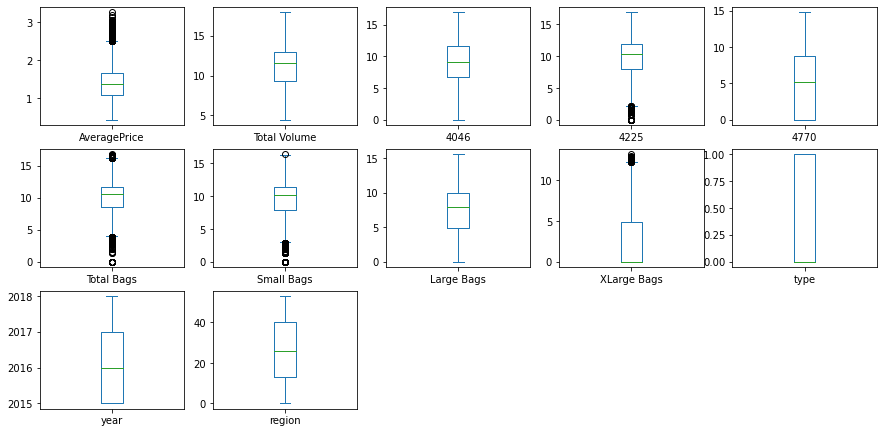

In [16]:
#plotting the boxplot of each column to check the outlier
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.

In [17]:
#calculating the z score
z=np.abs(zscore(df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags',
                   'type','year','region']]))
print(z)

       AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.107282  0.609752  0.374936  0.279143    0.494074   
1          0.139020      0.175949  0.737707  0.305200  0.233838    0.454761   
2          1.182069      0.158690  0.688840  0.618892  0.042078    0.523041   
3          0.809551      0.017121  0.583598  0.472808  0.181974    0.672335   
4          0.312861      0.207558  0.638425  0.298852  0.171717    0.644845   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.685006  0.407310  0.878279  1.217613    0.299689   
18245      0.755023      0.775077  0.568306  0.594835  1.217613    0.466102   
18246      1.152375      0.778901  0.568251  0.712597  0.370548    0.459975   
18247      1.301382      0.707798  0.494407  0.644192  0.370240    0.391424   
18248      0.531512      0.674542  0.304151  0.726698  0.087895    0.351204   

       Small Bags  Large Bags  XLarge Bags      typ

In [18]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(18249, 13)


In [19]:
#assigning the values to df_new which are less than threshold value and removing the outliers
df_new=df[(z<3).all(axis=1)]

In [20]:
print(df.shape)
print(df_new.shape)
df=df_new
print('Shape after removing the outliers',df.shape)

(18249, 13)
(17834, 13)
Shape after removing the outliers (17834, 13)


So, I first find the zscore value and then i decide to make one threshold value as 3 and then i remove all the outliers which zscore value is greater than 3.

# Correlation Matrix:

[]

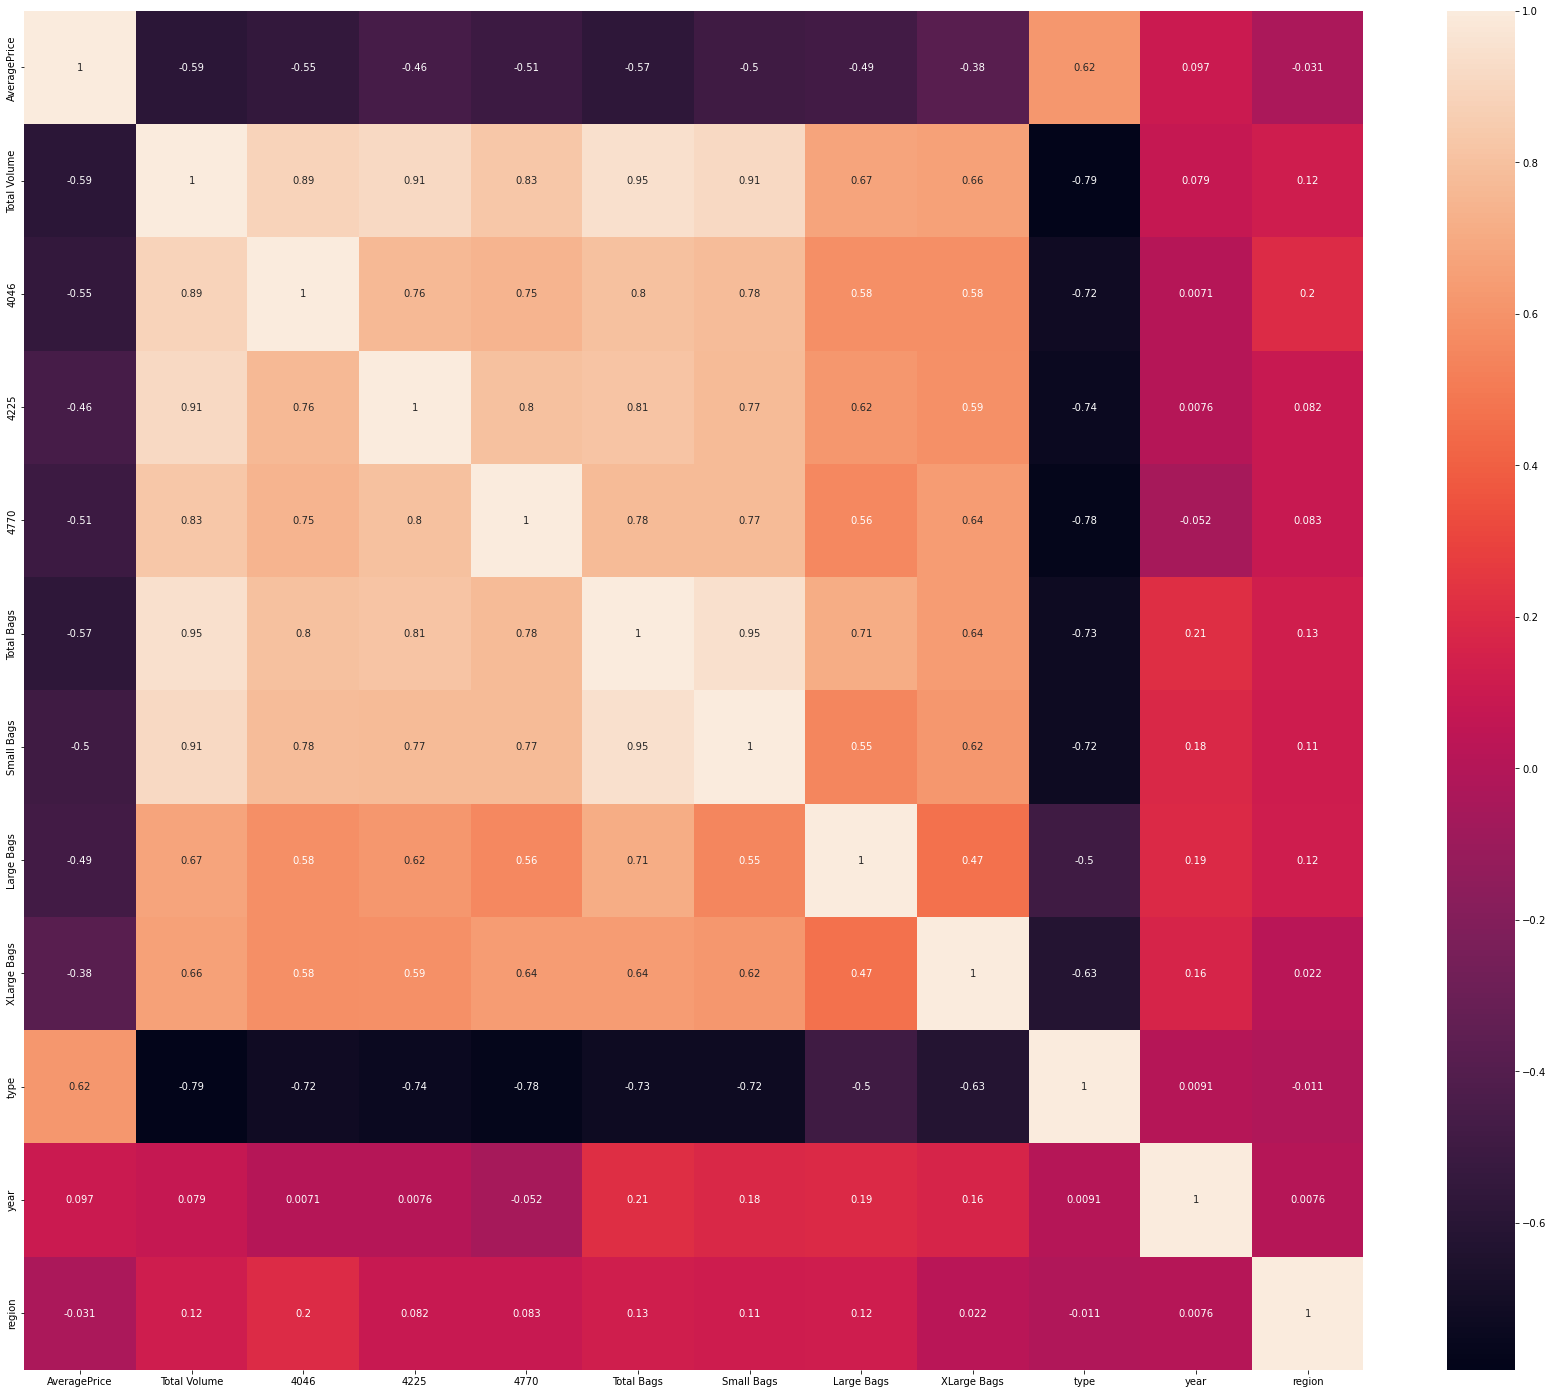

In [21]:
#checking the co-relation of all column to each other
df_cor=df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()

# Prediction with Average Price:

In [22]:
#store feature Matrix in x and response(target) in vector y
x=df.drop(['AveragePrice','Date'],axis=1)
y=df['AveragePrice']

In [23]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [24]:
print(x)

[[-0.13249789 -0.62742619  0.35800125 ... -0.97748783 -1.22957126
  -1.69078431]
 [-0.20162572 -0.75550098  0.28688711 ... -0.97748783 -1.22957126
  -1.69078431]
 [ 0.13526087 -0.70658843  0.6067806  ... -0.97748783 -1.22957126
  -1.69078431]
 ...
 [-0.8086277  -0.58588682 -0.75103402 ...  1.02303064  1.96090944
   1.71404749]
 [-0.73704662 -0.51197383 -0.681276   ...  1.02303064  1.96090944
   1.71404749]
 [-0.70356744 -0.32153998 -0.76541289 ...  1.02303064  1.96090944
   1.71404749]]


In [25]:
print(y)

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17834, dtype: float64


In [26]:
#Train/Test split
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
#Import the models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
#Model training
lr=LinearRegression()
lr.fit(x_train,y_train)
svm=SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [30]:
#prediction on test data
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)


In [31]:
df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [32]:
df1

,Actual,lr,svm,rf,gr
15119,2.15,1.841231,2.102539,1.8924,1.846155
13746,1.38,1.773284,1.637084,1.4268,1.629996
290,1.40,1.201438,1.328535,1.3941,1.300724
1570,1.00,1.193586,1.098114,1.0065,1.256330
8666,1.18,1.201346,1.114197,1.1381,1.148379
...,...,...,...,...,...
14367,1.61,1.679086,1.714400,1.6329,1.581765
7878,1.83,1.366220,1.463862,1.7455,1.458658
8848,1.42,1.265283,1.270729,1.3145,1.377138
17608,1.52,1.860955,1.556299,1.5600,1.580252


In [33]:
#compare performance visually
import matplotlib.pyplot as plt


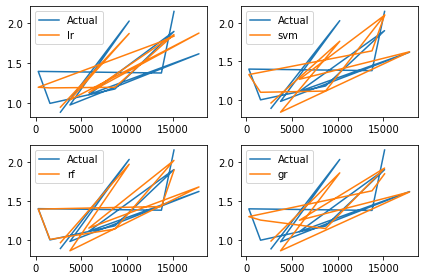

In [34]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label="lr")
plt.legend()
plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svm")
plt.legend()
plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()
plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.tight_layout()
plt.legend()

In [35]:
#Evaluating the Algorithm
from sklearn import metrics

In [36]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [37]:
print(score1,score2,score3,score4)

0.5384035742971647 0.7092238173407893 0.8443996930173596 0.674242075109003


RandomForest is out best model

In [38]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [39]:
print(s1,s2,s3,s4)

0.2039179514735098 0.15175887944744476 0.10345149985982617 0.16555711168755116


In [40]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0
1,20-12-2015,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0
2,13-12-2015,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0
3,06-12-2015,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0
4,29-11-2015,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0


In [41]:
#predict charges for new customer
data={'Total Volume':11.070,
     '4046':6.944,
     '4225':10.706,
     '4770':4.879,
     'Total Bags':9.005,
     'Small Bags':9.149,
     'Large Bags':4.545,
     'XLarge Bags':0.0,
     'type':0,
     'year':2015,
     'region':0}
df2=pd.DataFrame(data,index=[0])
df2

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11.07,6.944,10.706,4.879,9.005,9.149,4.545,0.0,0,2015,0


In [42]:
new_pred=rf.predict(df2)
print(new_pred)

[0.8816]


In [43]:
#Save mode using Joblib
rf=RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor()

In [44]:
import joblib

In [45]:
joblib.dump(rf,'model_joblib_rf')

['model_joblib_rf']

In [46]:
model=joblib.load('model_joblib_rf')

In [47]:
model.predict(df2)

array([0.8812])

# Prediction with region

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [49]:
#assign the value of x and y for training and testing phase
x_c=df.drop(columns=['region','Date'])
y_c=df[["region"]]
print(x_c.shape)
print(y_c.shape)

(17834, 11)
(17834, 1)


In [50]:
#standardize the value of x so that mean will 0 and sd will become 1,and make the data as normal distributed
sc=StandardScaler()
sc.fit_transform(x_c)
x_c=pd.DataFrame(x_c,columns=x_c.columns)

In [51]:
#train/test split
x_c_train,x_c_test,y_c_train,y_c_test=train_test_split(x_c,y_c,test_size=0.25,random_state=41)

In [52]:
rfc=RandomForestClassifier()
model_rfc=rfc.fit(x_c_train,y_c_train)
pred_rfc=model_rfc.predict(x_c_test)
print(confusion_matrix(y_c_test['region'],pred_rfc))
print(accuracy_score(y_c_test['region'],pred_rfc))

[[64  0  0 ...  0  0  0]
 [ 0 62  0 ...  0  0  0]
 [ 0  0 74 ...  0  0  0]
 ...
 [ 0  0  0 ... 90  0  0]
 [ 0  0  0 ...  1 85  0]
 [ 0  1  1 ...  0  0 72]]
0.9053599461762727


In [53]:
lr=LogisticRegression()
model_lr=lr.fit(x_c_train,y_c_train)
pred_lr=model_lr.predict(x_c_test)
print(confusion_matrix(y_c_test['region'],pred_lr))
print(accuracy_score(y_c_test['region'],pred_lr))

[[ 5  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  1  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ... 45 30  0]
 [ 0  3  0 ... 34 12  0]
 [ 0  0  3 ...  0  8  1]]
0.21260372280780443


In [54]:
dt=DecisionTreeClassifier()
model_dt=dt.fit(x_c_train,y_c_train)
pred_dt=model_dt.predict(x_c_test)
print(confusion_matrix(y_c_test['region'],pred_dt))
print(accuracy_score(y_c_test['region'],pred_dt))

[[52  0  0 ...  0  0  0]
 [ 0 46  0 ...  0  0  0]
 [ 0  0 64 ...  0  0  3]
 ...
 [ 0  0  0 ... 89  1  0]
 [ 0  0  0 ...  0 75  0]
 [ 0  2  1 ...  0  0 60]]
0.7970396949988787


In [55]:
ab=AdaBoostClassifier()
model_ab=ab.fit(x_c_train,y_c_train)
pred_ab=model_ab.predict(x_c_test)
print(confusion_matrix(y_c_test['region'],pred_ab))
print(accuracy_score(y_c_test['region'],pred_ab))

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 54  0  0]
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0  0  0]]
0.07669881139268894


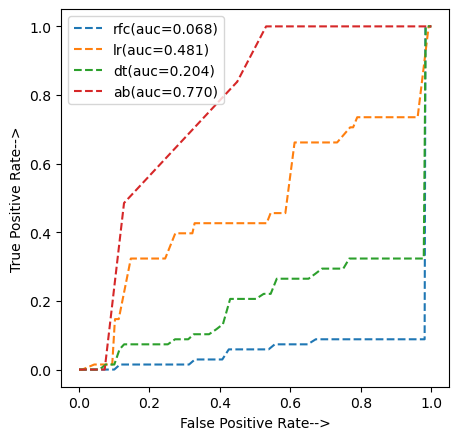

In [56]:
#plot ROC and compare AUC
from sklearn.metrics import roc_curve,auc
rfc_fpr,rfc_tpr,threshold=roc_curve(y_c_test,pred_rfc,pos_label=True)
auc_rfc=auc(rfc_fpr,rfc_tpr)
lr_fpr,lr_tpr,threshold=roc_curve(y_c_test,pred_lr,pos_label=True)
auc_lr=auc(lr_fpr,lr_tpr)
dt_fpr,dt_tpr,threshold=roc_curve(y_c_test,pred_dt,pos_label=True)
auc_dt=auc(dt_fpr,dt_tpr)
ab_fpr,ab_tpr,threshold=roc_curve(y_c_test,pred_ab,pos_label=True)
auc_ab=auc(ab_fpr,ab_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(rfc_fpr,rfc_tpr,linestyle='dashed',label='rfc(auc=%0.3f)'%auc_rfc)
plt.plot(lr_fpr,lr_tpr,linestyle='dashed',label='lr(auc=%0.3f)'%auc_lr)
plt.plot(dt_fpr,dt_tpr,linestyle='dashed',label='dt(auc=%0.3f)'%auc_dt)
plt.plot(ab_fpr,ab_tpr,linestyle='dashed',label='ab(auc=%0.3f)'%auc_ab)
plt.xlabel('False Positive Rate-->')
plt.ylabel('True Positive Rate-->')
plt.legend()
plt.show()

here,AdaBoost is our best modal

In [58]:
#Hyperparameter tuning
grid=dict()
grid['n_estimators']=[10,50,100,500]
grid['learning_rate']=[0.0001,0.001,0.01,0.1,1.0]
grid['algorithm']=['SAMME','SAMME.R']

grid_search=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,cv=10,scoring='accuracy')
#execute the grid search
grid_result=grid_search.fit(x_c,y_c)
#summarize the best score and confiuration
print("Best:%f using %s" %(grid_result.best_score_,grid_result.best_params_))


Best:0.200411 using {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 500}
